# Basic EDA
### IMPORTANT : The collected reviews and ratings range from Dec 2017 till January 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Recent_data_collected/BA_reviews_uncleaned.csv')
df.head()

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,NaN,4,yes,2024-01-07,True
1,Not Verified | Extremely rude ground service....,6,Family Leisure,Economy Class,Rome to London,4.0,5.0,4.0,1.0,NaN,2,no,2024-01-03,False
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,NaN,4,yes,2023-12-29,True
4,✅ Trip Verified | Flight left on time and arr...,6,Solo Leisure,Economy Class,London Heathrow to Istanbul,3.0,2.0,1.0,5.0,NaN,2,no,2023-12-29,True


In [7]:
cols = list(df.columns[1:-1])
cols.remove('Route')

for i in cols:
    print(f" Unique elements of {i} are : {df[i].unique()}")

 Unique elements of Overall_rating are : [ 9  6  1  8  2  5  3 10  4  7]
 Unique elements of Type Of Traveller are : ['Couple Leisure' 'Family Leisure' 'Solo Leisure' 'Business' nan]
 Unique elements of Seat Type are : ['Business Class' 'Economy Class' 'Premium Economy' 'First Class']
 Unique elements of Seat Comfort are : [ 5.  4.  2.  1.  3. nan]
 Unique elements of Cabin Staff Service are : [ 5.  1.  4.  2.  3. nan]
 Unique elements of Food & Beverages are : [ 5.  4.  1.  2. nan  3.]
 Unique elements of Ground Service are : [ 5.  1.  2.  3.  4. nan]
 Unique elements of Wifi & Connectivity are : [nan  1.  2.  5.  3.  4.]
 Unique elements of Value For Money are : [4 2 1 3 5]
 Unique elements of Recommended are : ['yes' 'no']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review               1370 non-null   object 
 1   Overall_rating       1370 non-null   int64  
 2   Type Of Traveller    1368 non-null   object 
 3   Seat Type            1370 non-null   object 
 4   Route                1367 non-null   object 
 5   Seat Comfort         1275 non-null   float64
 6   Cabin Staff Service  1264 non-null   float64
 7   Food & Beverages     1095 non-null   float64
 8   Ground Service       1307 non-null   float64
 9   Wifi & Connectivity  367 non-null    float64
 10  Value For Money      1370 non-null   int64  
 11  Recommended          1370 non-null   object 
 12  Date                 1370 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 139.3+ KB


In [145]:
df['Date'] = pd.to_datetime(df['Date'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review               1370 non-null   object        
 1   Overall_rating       1370 non-null   int64         
 2   Type Of Traveller    1368 non-null   object        
 3   Seat Type            1370 non-null   object        
 4   Route                1367 non-null   object        
 5   Seat Comfort         1275 non-null   float64       
 6   Cabin Staff Service  1264 non-null   float64       
 7   Food & Beverages     1095 non-null   float64       
 8   Ground Service       1307 non-null   float64       
 9   Wifi & Connectivity  367 non-null    float64       
 10  Value For Money      1370 non-null   int64         
 11  Recommended          1370 non-null   object        
 12  Date                 1370 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5),

In [147]:
df.isnull().sum()

Review                    0
Overall_rating            0
Type Of Traveller         2
Seat Type                 0
Route                     3
Seat Comfort             95
Cabin Staff Service     106
Food & Beverages        275
Ground Service           63
Wifi & Connectivity    1003
Value For Money           0
Recommended               0
Date                      0
dtype: int64

### We can change NaN values to " Not Rated" for categorical visualisation and simply keep it as  NaN for numericaly analysis. Since we are not performing any model training, we won't remove these records.

In [148]:
df['verified'] = df.Review.str.contains("Trip Verified")

In [149]:
df.head()

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,NaN,4,yes,2024-01-07,True
1,Not Verified | Extremely rude ground service....,6,Family Leisure,Economy Class,Rome to London,4.0,5.0,4.0,1.0,NaN,2,no,2024-01-03,False
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,NaN,4,yes,2023-12-29,True
4,✅ Trip Verified | Flight left on time and arr...,6,Solo Leisure,Economy Class,London Heathrow to Istanbul,3.0,2.0,1.0,5.0,NaN,2,no,2023-12-29,True


In [150]:
df.shape

(1370, 14)

In [151]:
df.duplicated().value_counts()

False    1370
dtype: int64

In [44]:
df['Route'].value_counts()

London to Johannesburg            13
Johannesburg to London            11
London to Cape Town               11
Hong Kong to London               10
London to Athens                  10
                                  ..
Ottawa to Ahmedabad                1
Antigua to London                  1
Sofia to London Heathrow           1
Mexico City to London Heathrow     1
Dublin to Heathrow                 1
Name: Route, Length: 857, dtype: int64

In [152]:
df.to_csv('Recent_data_collected/BA_reviews_uncleaned.csv',index=False)

### Renames missing values as Not Available/Rated

In [3]:
df1= df.copy()

In [4]:
df1=df1.replace(np.nan,"Not Available/Rated")

In [5]:
df1.head()

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,Not Available/Rated,4,yes,2024-01-07,True
1,Not Verified | Extremely rude ground service....,6,Family Leisure,Economy Class,Rome to London,4.0,5.0,4.0,1.0,Not Available/Rated,2,no,2024-01-03,False
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,Not Available/Rated,4,yes,2023-12-29,True
4,✅ Trip Verified | Flight left on time and arr...,6,Solo Leisure,Economy Class,London Heathrow to Istanbul,3.0,2.0,1.0,5.0,Not Available/Rated,2,no,2023-12-29,True


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review               1370 non-null   object        
 1   Overall_rating       1370 non-null   int64         
 2   Type Of Traveller    1370 non-null   object        
 3   Seat Type            1370 non-null   object        
 4   Route                1370 non-null   object        
 5   Seat Comfort         1370 non-null   object        
 6   Cabin Staff Service  1370 non-null   object        
 7   Food & Beverages     1370 non-null   object        
 8   Ground Service       1370 non-null   object        
 9   Wifi & Connectivity  1370 non-null   object        
 10  Value For Money      1370 non-null   int64         
 11  Recommended          1370 non-null   object        
 12  Date                 1370 non-null   datetime64[ns]
 13  verified             1370 non-nul

# EDA

In [81]:
df1.columns.tolist()

['Review',
 'Overall_rating',
 'Type Of Traveller',
 'Seat Type',
 'Route',
 'Seat Comfort',
 'Cabin Staff Service',
 'Food & Beverages',
 'Ground Service',
 'Wifi & Connectivity',
 'Value For Money',
 'Recommended',
 'Date',
 'verified']

## Visualizations

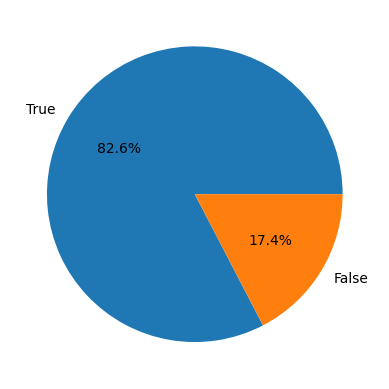

In [108]:
verification_count = df1['verified'].value_counts()
plt.pie(verification_count, labels=verification_count.index, autopct='%1.1f%%')
plt.show()

### Out of all the reviews and ratings, 82.6% are verified trips. Thats good because we can gain insights from genuine reviews. We will consider only those ratings that have verified trip.

In [8]:
df_verified = df[df['verified'] == True]

In [9]:
df_verified.describe()

,Overall_rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money
count,1132.000000,1063.000000,1052.000000,911.000000,1089.000000,294.000000,1132.000000
mean,4.280035,2.743180,3.158745,2.689352,2.698806,2.197279,2.471731
std,3.258700,1.382187,1.536888,1.473982,1.521056,1.496934,1.489751
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000
75%,7.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Insights:
-  Average rating of Wifi Connectivity is the lowest with 2.19 and Cabin Staff service has highest with 3.15
- Also, not many people have rated Wifi Connectivity (only 294)
- Average overall rating is 4.28 out of 10 which is not good.


### Categorical plots to see rating variation

In [113]:
df_cat = df1[df1['verified'] == True]
df_cat.head()

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,Not Available/Rated,4,yes,2024-01-07,True
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,Not Available/Rated,4,yes,2023-12-29,True
4,✅ Trip Verified | Flight left on time and arr...,6,Solo Leisure,Economy Class,London Heathrow to Istanbul,3.0,2.0,1.0,5.0,Not Available/Rated,2,no,2023-12-29,True
5,✅ Trip Verified | Very Poor Business class pr...,2,Business,Business Class,Gatwick to St Lucia,1.0,5.0,2.0,1.0,2.0,2,no,2023-12-27,True


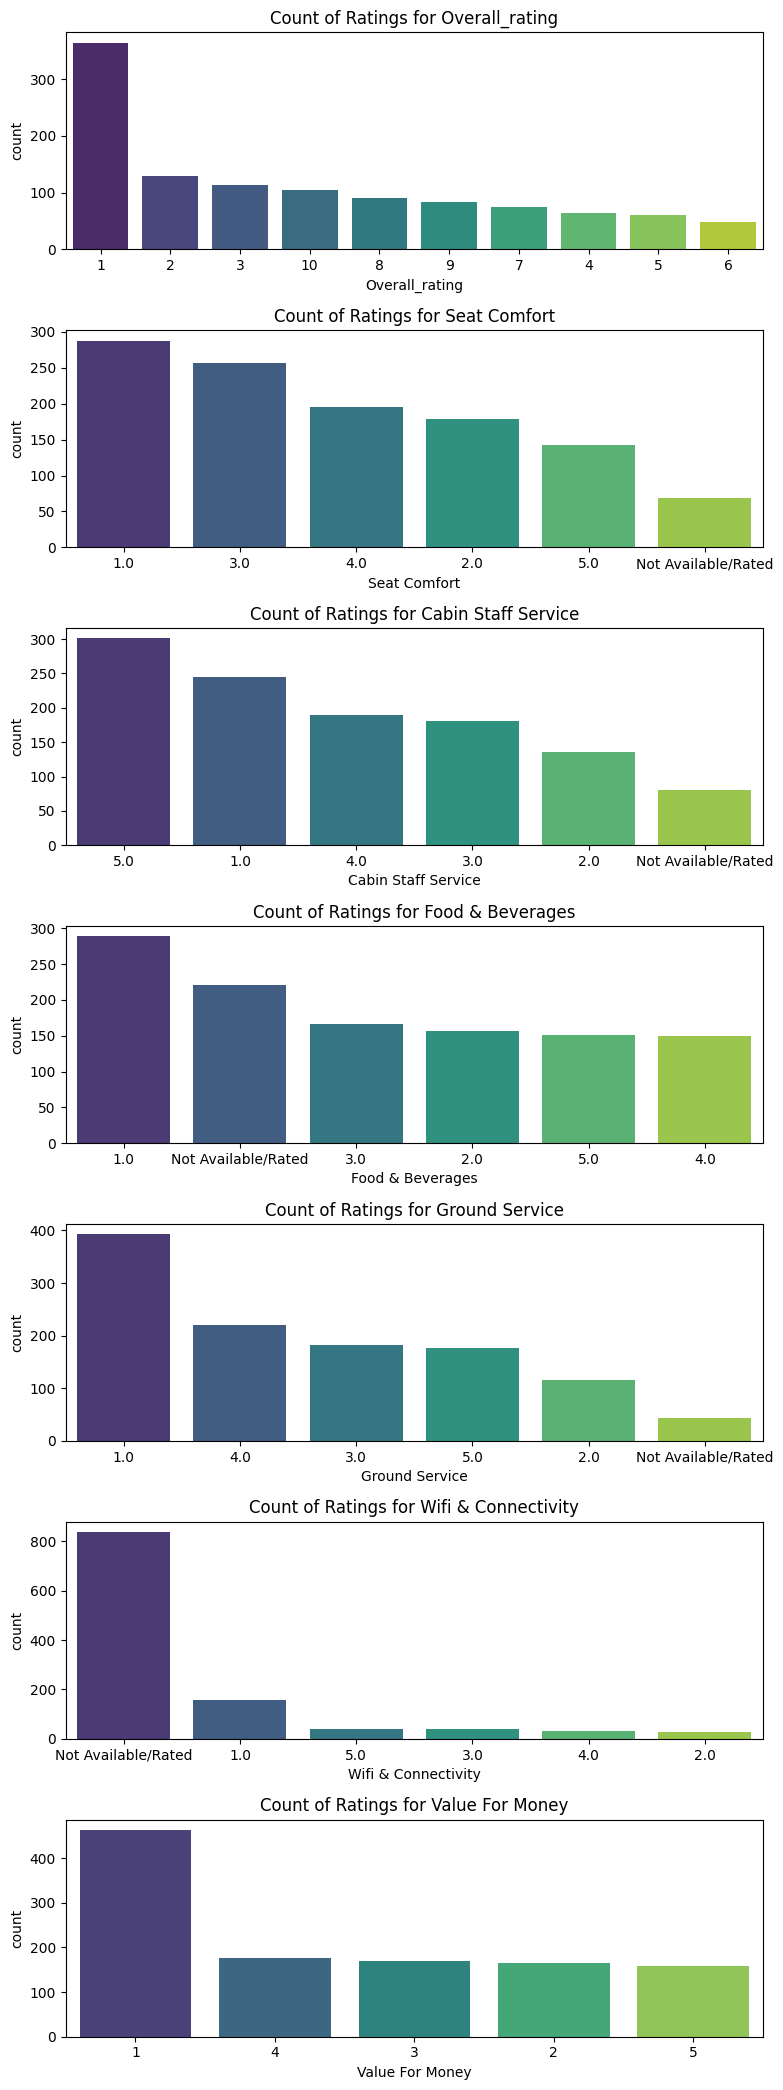

In [114]:
cols = ['Overall_rating','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity','Value For Money']
fig, axs = plt.subplots(len(cols), figsize=(8, 3*len(cols)))

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df_cat, order = df_cat[col].value_counts().index, palette='viridis', ax=axs[i])
    axs[i].set_title(f'Count of Ratings for {col}')

plt.tight_layout()
plt.show()

### Insight:
* Majority overall rating has been 1, which is a bad sign. Even top 3 highest ratings are 1,2 and 3 which says that airlines needs to improve a lot.
* Seat comfort has mixed ratings eventhough highest is 1.
* Cabin Staff service has highest positive rating.
* Ground service has 1 star has highest rating but it is followed by 4 star so his suggests that experiences with ground service may vary widely among customers.
*  Wifi & Connectivity has a large number of unrated responses, which could indicate a lack of availability or awareness of the service but apart from that 1 star has highest rating indicating poor service.
* Food and Beverages have high 1 star rating which is not good and many of them have not rated also. But we can see that number of 3,4 and 5 stars us constant at around 200 counts.
* Many people have rated 1star for value for money.

### Numerical plots 

In [122]:
df_int = df.copy()

In [124]:
df_int = df_int[df_int['verified']==True]

In [118]:
df_int.head()

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,NaN,4,yes,2024-01-07,True
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,NaN,4,yes,2023-12-29,True
4,✅ Trip Verified | Flight left on time and arr...,6,Solo Leisure,Economy Class,London Heathrow to Istanbul,3.0,2.0,1.0,5.0,NaN,2,no,2023-12-29,True
5,✅ Trip Verified | Very Poor Business class pr...,2,Business,Business Class,Gatwick to St Lucia,1.0,5.0,2.0,1.0,2.0,2,no,2023-12-27,True


In [119]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1369
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review               1132 non-null   object        
 1   Overall_rating       1132 non-null   int64         
 2   Type Of Traveller    1130 non-null   object        
 3   Seat Type            1132 non-null   object        
 4   Route                1131 non-null   object        
 5   Seat Comfort         1063 non-null   float64       
 6   Cabin Staff Service  1052 non-null   float64       
 7   Food & Beverages     911 non-null    float64       
 8   Ground Service       1089 non-null   float64       
 9   Wifi & Connectivity  294 non-null    float64       
 10  Value For Money      1132 non-null   int64         
 11  Recommended          1132 non-null   object        
 12  Date                 1132 non-null   datetime64[ns]
 13  verified             1132 non-nul

In [120]:
columns = ['Type Of Traveller', 'Overall_rating', 'Seat Type', 'Seat Comfort', 'Cabin Staff Service', 
           'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 
           'Value For Money', 'Recommended']

for column in columns:
    unique_values = df_int[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Type Of Traveller': ['Couple Leisure' 'Family Leisure' 'Solo Leisure' 'Business' nan]
Unique values in 'Overall_rating': [ 9  1  8  6  2  3 10  4  7  5]
Unique values in 'Seat Type': ['Business Class' 'Economy Class' 'First Class' 'Premium Economy']
Unique values in 'Seat Comfort': [ 5.  2.  1.  3.  4. nan]
Unique values in 'Cabin Staff Service': [ 5.  1.  4.  2. nan  3.]
Unique values in 'Food & Beverages': [ 5.  1.  2.  4. nan  3.]
Unique values in 'Ground Service': [ 5.  1.  2.  3.  4. nan]
Unique values in 'Wifi & Connectivity': [nan  1.  2.  5.  3.  4.]
Unique values in 'Value For Money': [4 1 2 5 3]
Unique values in 'Recommended': ['yes' 'no']


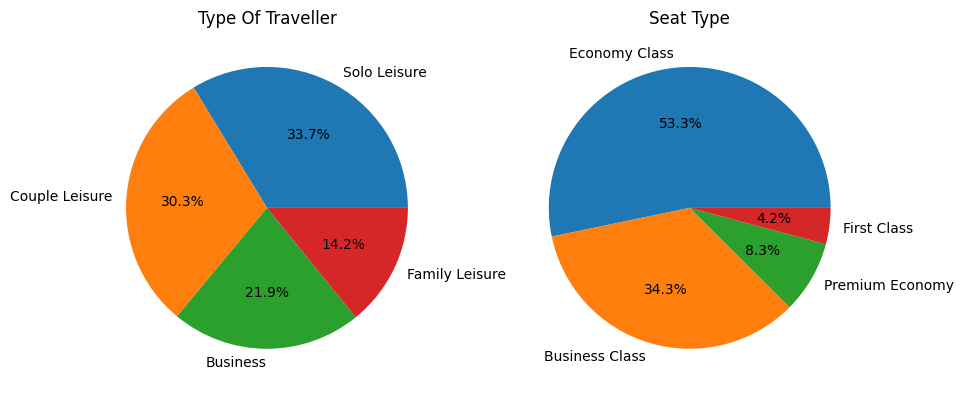

In [125]:


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Create a pie chart for 'Type Of Traveller'
type_counts = df_int['Type Of Traveller'].value_counts()
ax[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
ax[0].set_title('Type Of Traveller')

# Create a pie chart for 'Seat Type'
seat_counts = df_int['Seat Type'].value_counts()
ax[1].pie(seat_counts, labels=seat_counts.index, autopct='%1.1f%%')
ax[1].set_title('Seat Type')

# Show plot
plt.show()

### Insight :
* Solo and Couple traveller hold the major portion with 33.7% and 30.3% respectively.
* Economy class is the most opted seat type at 53.3% where as Business class comes seconda at 34.3%

In [126]:
# Calculate average ratings
avg_ratings_traveller = df_int.groupby('Type Of Traveller')[['Overall_rating','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity','Value For Money']].mean()
avg_ratings_seat = df_int.groupby('Seat Type')[['Overall_rating','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity','Value For Money']].mean()

# Calculate total average
avg_ratings_traveller['Total Average'] = avg_ratings_traveller.drop('Overall_rating',axis=1).mean(axis=1)
avg_ratings_seat['Total Average'] = avg_ratings_seat.drop('Overall_rating',axis=1).mean(axis=1)

In [127]:
avg_ratings_traveller

,Overall_rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Total Average
Type Of Traveller,,,,,,,,
Business,3.408907,2.464912,2.813333,2.280612,2.420601,2.063291,2.076923,2.353279
Couple Leisure,4.312865,2.690184,3.136223,2.693380,2.707831,2.194805,2.494152,2.652763
Family Leisure,4.381250,2.693333,3.208054,2.801653,2.703947,2.517241,2.475000,2.733205
Solo Leisure,4.790026,2.994413,3.384181,2.908497,2.867925,2.100000,2.713911,2.828154


In [128]:
avg_ratings_seat

,Overall_rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Total Average
Seat Type,,,,,,,,
Business Class,4.765464,2.750000,3.240642,2.902235,2.851852,2.275000,2.572165,2.765316
Economy Class,3.764511,2.621377,3.034991,2.447867,2.486957,2.000000,2.339967,2.488526
First Class,6.255319,3.717391,3.934783,3.413043,3.456522,2.444444,3.170213,3.356066
Premium Economy,4.595745,2.966292,3.168539,2.600000,3.022222,2.607143,2.553191,2.819565


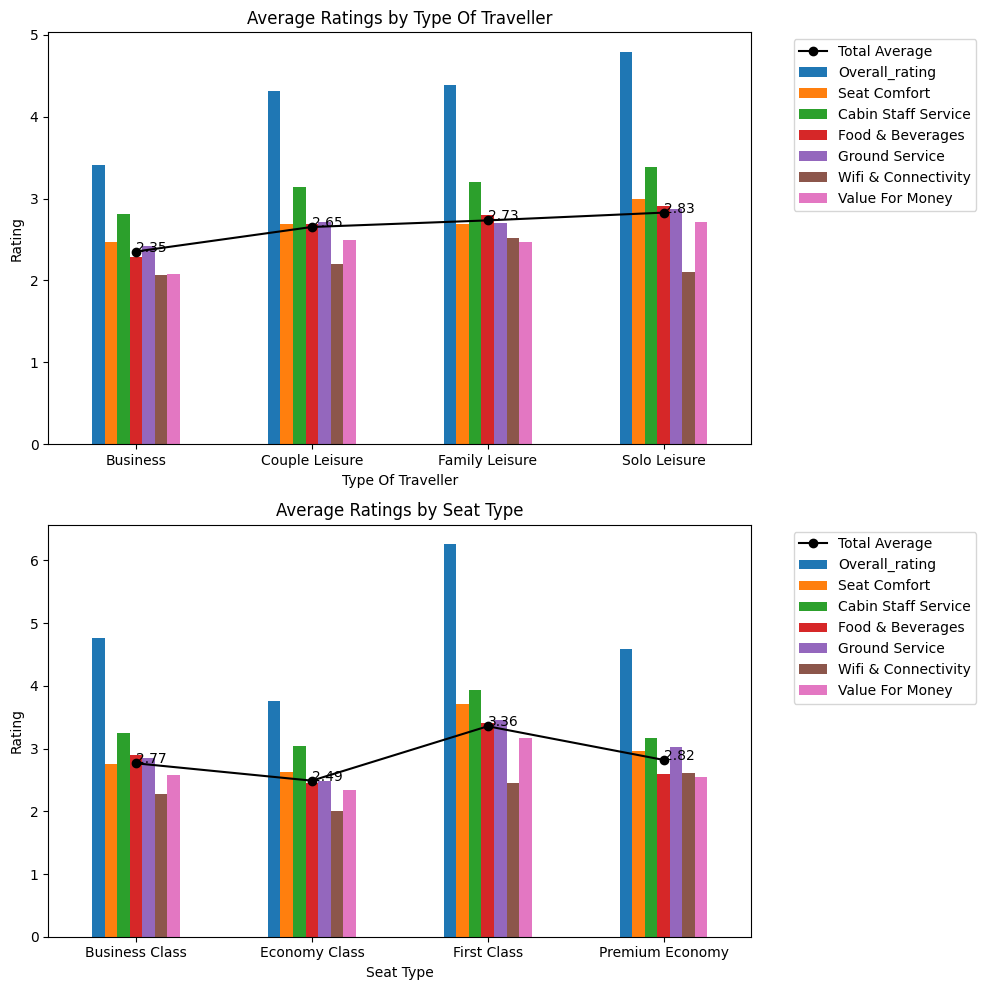

In [129]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Create a bar chart for 'Type Of Traveller'
avg_ratings_traveller.drop('Total Average', axis=1).plot(kind='bar', ax=ax[0])
ax[0].set_title('Average Ratings by Type Of Traveller')
ax[0].set_ylabel('Rating')

# Add line plot for 'Total Average'
avg_ratings_traveller['Total Average'].plot(color='black', marker='o', ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i,j in enumerate(avg_ratings_traveller['Total Average']):
    ax[0].annotate(f"{j:.2f}", xy=(i,j))

# Create a bar chart for 'Seat Type'
avg_ratings_seat.drop('Total Average', axis=1).plot(kind='bar', ax=ax[1])
ax[1].set_title('Average Ratings by Seat Type')
ax[1].set_ylabel('Rating')

# Add line plot for 'Total Average'
avg_ratings_seat['Total Average'].plot(color='black', marker='o', ax=ax[1])
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i,j in enumerate(avg_ratings_seat['Total Average']):
    ax[1].annotate(f"{j:.2f}", xy=(i,j))

# Show plot
plt.tight_layout()
plt.show()


### Insights:
* Solo traveller at 2.83 have highest avg rating as well as highest overall rating where as business clas has lowest average rating at 2.35. But we can say that, there is not much difference in total average for all traveller types and the rating is not good.
* All travllers have voted the highest for Cabin staff service and lowest to Wifi&Connectivity but we need to keep in mind that majority people have not rated wifi service. Second lowest is value for money.
* In seat type, First Class has highest average rating of 3.36 where as Economy class has Lowest at 2.49. But we need to keep in mind that the quantity of Economy class traveller were much more than first class. So low average is natural.
* Across all seat types, cabin service has been highly voted.

* __Overall, out of 5, across seat types and traveller types, the ratings have been poor.__

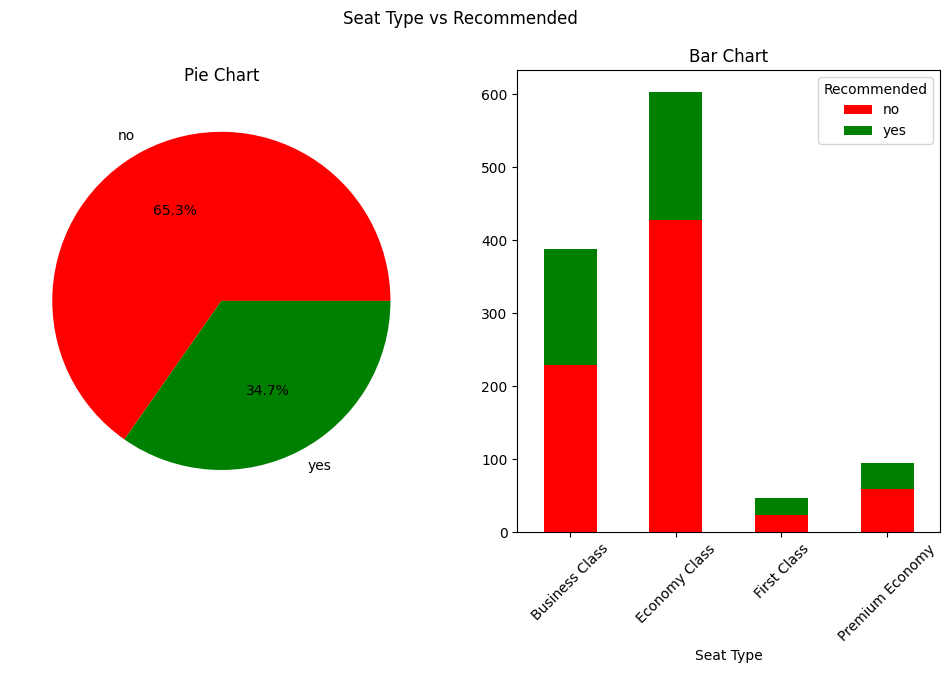

In [130]:
# Define color mapping
color_dict = {'yes': 'green', 'no': 'red'}

# Create pie chart
pie_data = df_int['Recommended'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(pie_data, labels=pie_data.index, colors=[color_dict[i] for i in pie_data.index], autopct='%1.1f%%')
plt.title('Pie Chart')

# Create bar chart
plt.subplot(122)
seat_type_counts = df_int.groupby(['Seat Type', 'Recommended']).size().unstack()
seat_type_counts.plot(kind='bar', stacked=True, color=[color_dict[i] for i in seat_type_counts.columns], ax=plt.gca())
plt.title('Bar Chart')

plt.xticks(rotation=45)

# Show figure
plt.suptitle('Seat Type vs Recommended')
plt.show()

### Insights:
* As we can see from pie chart, majority people have NOT recommended the airlines with 65.3% people saying no.
* Even across seat types, the portion of recommendation being NO are more than YES that indicates none of the seat types had satisfactory services.

#### Lets consider only the reviews

In [136]:
df_reviews = df.copy()
df_reviews = df_reviews[['Review']]

In [137]:
df_reviews.head()

,Review
0,✅ Trip Verified | First time using BA busines...
1,Not Verified | Extremely rude ground service....
2,✅ Trip Verified | My son and I flew to Geneva...
3,✅ Trip Verified | For the price paid (bought ...
4,✅ Trip Verified | Flight left on time and arr...


In [141]:
df_reviews.to_csv('Recent_data_collected/Only_reviews_uncleaned.csv',index=False)